In [1]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS


In [2]:
# abrir mi fits
slit1 = '../../../reduccion/NGC1313/cal/slit1.fits'
sp1 = fits.open(slit1)

sp1.info()
sp1[0].header["OBJECT"]

Filename: ../../../reduccion/NGC1313/cal/slit1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2234, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

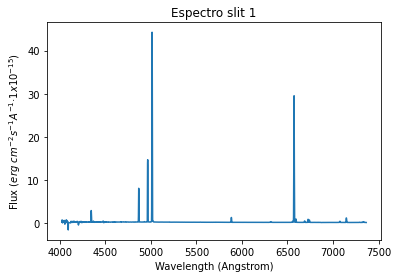

In [3]:
# extraer data (flux)
data1=sp1[0].data
header1=sp1[0].header
obj_name1 = header1.get("OBJECT", "Unknown")

flux1=data1[0]
w1=WCS(header1, naxis=1, relax=False, fix=False)
wave1=w1.wcs_pix2world(np.arange(len(flux1)),0)[0]

plt.plot(wave1, flux1)
plt.title("Espectro slit 1")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [4]:
wave1, flux1

(array([4024.00463867, 4025.50053573, 4026.99643278, ..., 7361.35096765,
        7362.8468647 , 7364.34276175]),
 array([0.28093654, 0.1263353 , 0.66459733, ..., 0.07287291, 0.07423379,
        0.06625135], dtype=float32))

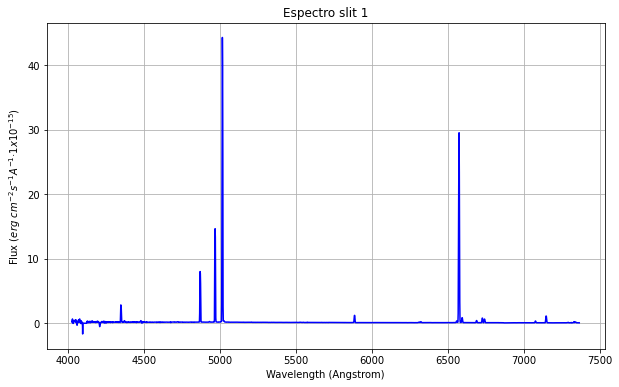

In [5]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave1, flux1, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 1')
plt.grid(True)
plt.show()

In [6]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave1
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave1_ccm89 = extinction.ccm89(wave1, 0.299, 3.1)
print(f' extinción en magnitudes para slit 1 con ccm89: {wave1_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave1_f99 = extinction.fitzpatrick99(wave1, 0.299, 3.1)
print(f' extinción en magnitudes para slit 1 con f99: {wave1_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave1_fm07 = extinction.fm07(wave1, 0.299)
print(f' extinción en magnitudes para slit 1 con fm07: {wave1_fm07}')

 extinción en magnitudes para slit 1 con ccm89: [0.43563222 0.43548925 0.43534611 ... 0.2074851  0.20741561 0.20734611]
 extinción en magnitudes para slit 1 con f99: [0.42348602 0.4233575  0.42322902 ... 0.18983148 0.18976888 0.18970631]
 extinción en magnitudes para slit 1 con fm07: [0.42440037 0.42426886 0.42413734 ... 0.18972868 0.18966116 0.18959367]


In [7]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux1}')

# "deredden" flux by A_V = 0.299 with CCM89
flux1_ccm89 = remove(ccm89(wave1, 0.299, 3.1), flux1)
print(f'valor de flujo deredden para slit 1 con ccm89: {flux1_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux1_f99 = remove(fitzpatrick99(wave1, 0.299, 3.1), flux1)
print(f'valor de flujo deredden para slit 1 con f99: {flux1_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux1_fm07 = remove(fm07(wave1, 0.299), flux1)
print(f'valor de flujo deredden para slit 1 con fm07: {flux1_fm07}')

valor de flujo original: [0.28093654 0.1263353  0.66459733 ... 0.07287291 0.07423379 0.06625135]
valor de flujo deredden para slit 1 con ccm89: [0.41962477 0.18867762 0.99242349 ... 0.08821859 0.0898603  0.0801924 ]
valor de flujo deredden para slit 1 con f99: [0.41495656 0.18658112 0.98140937 ... 0.08679579 0.08841158 0.07890005]
valor de flujo deredden para slit 1 con fm07: [0.41530616 0.1867378  0.98223076 ... 0.08678758 0.08840281 0.07889186]


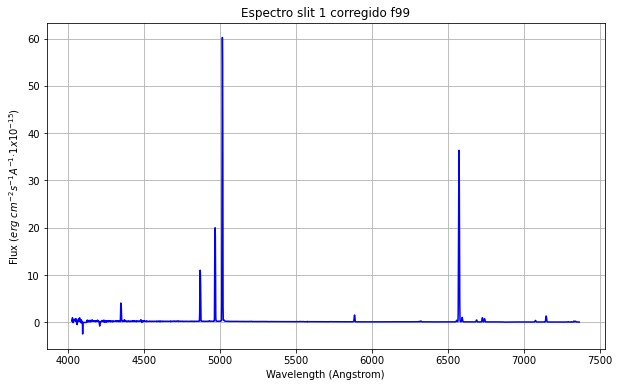

In [8]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave1, flux1_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 1 corregido f99')
plt.grid(True)
plt.show()

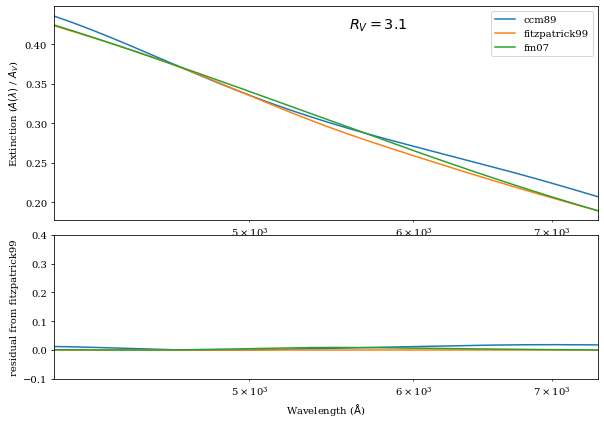

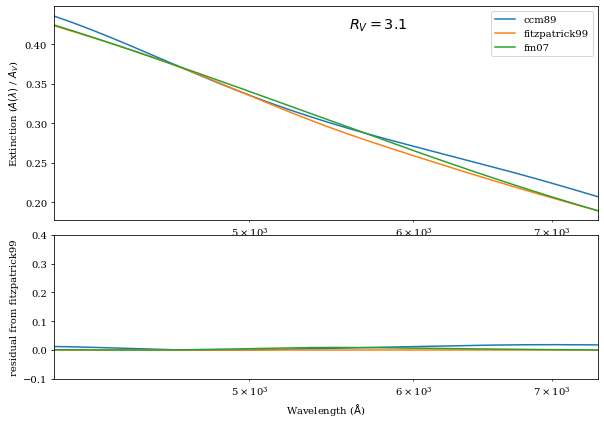

In [9]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda1 = {'ccm89': extinction.ccm89(wave1, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave1, 0.299, 3.1),
            'fm07': extinction.fm07(wave1, 0.299)}
extinction_figure(wave1, a_lambda1, 'fitzpatrick99')

In [10]:
resta_f99 = flux1_f99 - flux1
resta_f99

array([0.13402002, 0.06024583, 0.31681204, ..., 0.01392289, 0.0141778 ,
       0.0126487 ])

In [11]:
resta_ccm89 = flux1_ccm89 - flux1
resta_ccm89

array([0.13868823, 0.06234233, 0.32782616, ..., 0.01534569, 0.01562651,
       0.01394104])

In [12]:
sp1

In [13]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data1[0] = flux1_f99

# crear nuevo HDU 
slit1corrected = fits.PrimaryHDU(data=data1, header=header1)

# crear nuevo HDUList para guardar en un fits
sp1_corrected = fits.HDUList([slit1corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file = '../../../reduccion/NGC1313/cal/slit1_2D_f99.fits'
sp1_corrected.writeto(new_fits_file, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file}")

Se ha guardado el archivo FITS corregido: ../../../reduccion/NGC1313/cal/slit1_2D_f99.fits


SLIT 3

In [14]:
# abrir mi fits
slit3 = '../../../reduccion/NGC1313/cal/slit3.fits'
sp3 = fits.open(slit3)

sp3.info()
sp3[0].header["OBJECT"]

Filename: ../../../reduccion/NGC1313/cal/slit3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2225, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

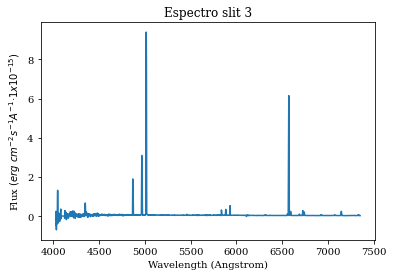

In [15]:
# extraer data (flux)
data3=sp3[0].data
header3=sp3[0].header
obj_name3 = header3.get("OBJECT", "Unknown")

flux3=data3[0]
w3=WCS(header3, naxis=1, relax=False, fix=False)
wave3=w3.wcs_pix2world(np.arange(len(flux3)),0)[0]

plt.plot(wave3, flux3)
plt.title("Espectro slit 3")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [16]:
wave3, flux3

(array([4024.88818359, 4026.38395143, 4027.87971926, ..., 7348.48430586,
        7349.98007369, 7351.47584152]),
 array([-0.21122663,  0.23303586, -0.48038784, ...,  0.02420557,
         0.02303245,  0.0214294 ], dtype=float32))

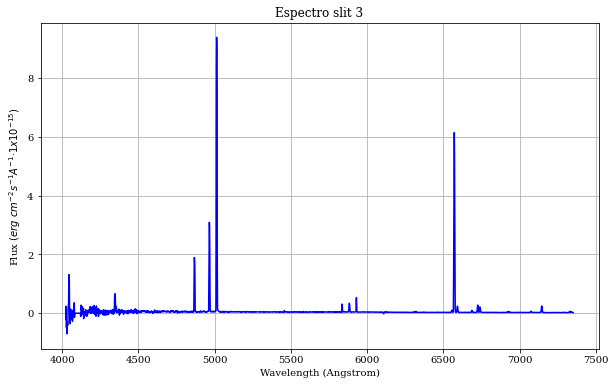

In [17]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave3, flux3, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 3')
plt.grid(True)
plt.show()

In [18]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave3
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave3_ccm89 = extinction.ccm89(wave3, 0.299, 3.1)
print(f' extinción en magnitudes para slit 3 con ccm89: {wave3_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave3_f99 = extinction.fitzpatrick99(wave3, 0.299, 3.1)
print(f' extinción en magnitudes para slit 3 con f99: {wave3_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave3_fm07 = extinction.fm07(wave3, 0.299)
print(f' extinción en magnitudes para slit 3 con fm07: {wave3_fm07}')

 extinción en magnitudes para slit 3 con ccm89: [0.4355478  0.43540474 0.4352615  ... 0.20808301 0.20801349 0.20794397]
 extinción en magnitudes para slit 3 con f99: [0.42341011 0.42328162 0.42315317 ... 0.19037104 0.19030821 0.19024541]
 extinción en magnitudes para slit 3 con fm07: [0.4243227  0.42419119 0.42405968 ... 0.19031071 0.19024293 0.19017518]


In [19]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux3}')

# "deredden" flux by A_V = 0.299 with CCM89
flux3_ccm89 = remove(ccm89(wave3, 0.299, 3.1), flux3)
print(f'valor de flujo deredden para slit 3 con ccm89: {flux3_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux3_f99 = remove(fitzpatrick99(wave3, 0.299, 3.1), flux3)
print(f'valor de flujo deredden para slit 3 con f99: {flux3_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux3_fm07 = remove(fm07(wave3, 0.299), flux3)
print(f'valor de flujo deredden para slit 3 con fm07: {flux3_fm07}')

valor de flujo original: [-0.21122663  0.23303586 -0.48038784 ...  0.02420557  0.02303245
  0.0214294 ]
valor de flujo deredden para slit 3 con ccm89: [-0.31547706  0.34800434 -0.71729302 ...  0.02931896  0.02789623
  0.02595301]
valor de flujo deredden para slit 3 con f99: [-0.31196991  0.3441402  -0.70933807 ...  0.02884455  0.02744502
  0.02553338]
valor de flujo deredden para slit 3 con fm07: [-0.31223224  0.34442863 -0.70993057 ...  0.02884295  0.02744337
  0.02553173]


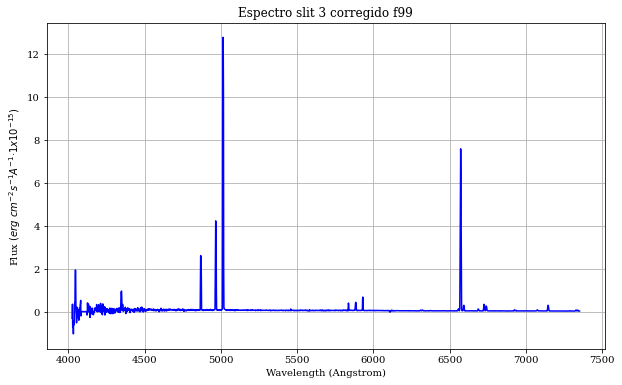

In [20]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave3, flux3_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 3 corregido f99')
plt.grid(True)
plt.show()

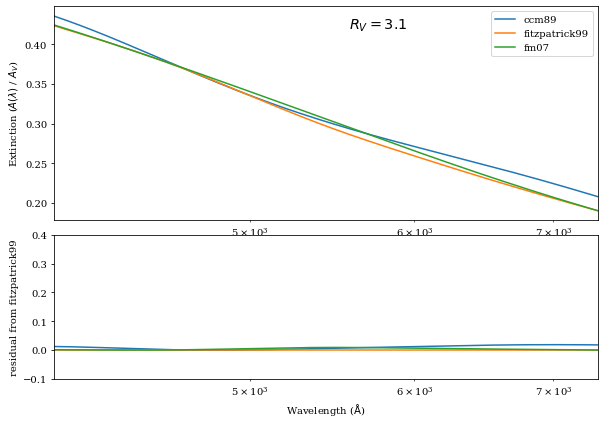

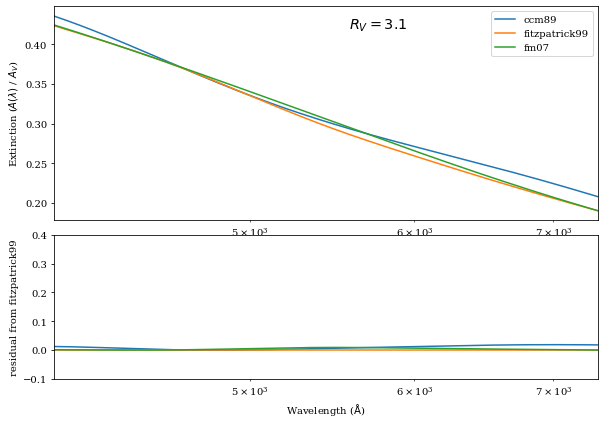

In [21]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda3 = {'ccm89': extinction.ccm89(wave3, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave3, 0.299, 3.1),
            'fm07': extinction.fm07(wave3, 0.299)}
extinction_figure(wave3, a_lambda3, 'fitzpatrick99')

In [22]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data3[0] = flux3_f99

# crear nuevo HDU 
slit3corrected = fits.PrimaryHDU(data=data3, header=header3)

# crear nuevo HDUList para guardar en un fits
sp3_corrected = fits.HDUList([slit3corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file3 = '../../../reduccion/NGC1313/cal/slit3_2D_f99.fits'
sp3_corrected.writeto(new_fits_file3, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file3}")

Se ha guardado el archivo FITS corregido: ../../../reduccion/NGC1313/cal/slit3_2D_f99.fits


SLIT 5

In [23]:
# abrir mi fits
slit5 = '../../../reduccion/NGC1313/cal/slit5.fits'
sp5 = fits.open(slit5)

sp5.info()
sp5[0].header["OBJECT"]

Filename: ../../../reduccion/NGC1313/cal/slit5.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2294, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

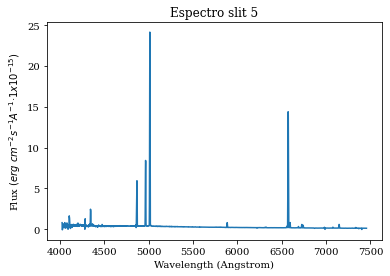

In [24]:
# extraer data (flux)
data5=sp5[0].data
header5=sp5[0].header
obj_name5 = header5.get("OBJECT", "Unknown")

flux5=data5[0]
w5=WCS(header5, naxis=1, relax=False, fix=False)
wave5=w5.wcs_pix2world(np.arange(len(flux5)),0)[0]

plt.plot(wave5, flux5)
plt.title("Espectro slit 5")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [25]:
wave5, flux5

(array([4026.58569336, 4028.08087313, 4029.5760529 , ..., 7452.04255188,
        7453.53773165, 7455.03291142]),
 array([ 0.7848763 ,  0.35653698, -0.08566111, ...,  0.10053584,
         0.09873971,  0.10325038], dtype=float32))

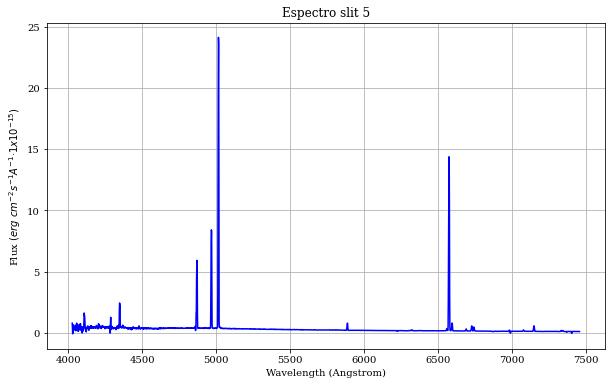

In [26]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave5, flux5, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 5')
plt.grid(True)
plt.show()

In [27]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave3
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave5_ccm89 = extinction.ccm89(wave5, 0.299, 3.1)
print(f' extinción en magnitudes para slit 5 con ccm89: {wave5_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave5_f99 = extinction.fitzpatrick99(wave5, 0.299, 3.1)
print(f' extinción en magnitudes para slit 5 con f99: {wave5_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave5_fm07 = extinction.fm07(wave5, 0.299)
print(f' extinción en magnitudes para slit 5 con fm07: {wave5_fm07}')

 extinción en magnitudes para slit 5 con ccm89: [0.43538543 0.43524222 0.43509885 ... 0.20327908 0.20320989 0.2031407 ]
 extinción en magnitudes para slit 5 con f99: [0.42326429 0.4231359  0.42300753 ... 0.18608519 0.18602426 0.18596335]
 extinción en magnitudes para slit 5 con fm07: [0.42417346 0.42404199 0.42391052 ... 0.18569145 0.18562584 0.18556026]


In [28]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux5}')

# "deredden" flux by A_V = 0.299 with CCM89
flux5_ccm89 = remove(ccm89(wave5, 0.299, 3.1), flux5)
print(f'valor de flujo deredden para slit 5 con ccm89: {flux5_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux5_f99 = remove(fitzpatrick99(wave5, 0.299, 3.1), flux5)
print(f'valor de flujo deredden para slit 5 con f99: {flux5_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux5_fm07 = remove(fm07(wave5, 0.299), flux5)
print(f'valor de flujo deredden para slit 5 con fm07: {flux5_fm07}')

valor de flujo original: [ 0.7848763   0.35653698 -0.08566111 ...  0.10053584  0.09873971
  0.10325038]
valor de flujo deredden para slit 5 con ccm89: [ 1.17207494  0.53235517 -0.12788606 ...  0.12123626  0.11906272
  0.12449386]
valor de flujo deredden para slit 5 con f99: [ 1.15906269  0.5264522  -0.12646976 ...  0.11933147  0.11719296
  0.12253975]
valor de flujo deredden para slit 5 con fm07: [ 1.16003366  0.52689173 -0.12657498 ...  0.1192882   0.11714997
  0.12249426]


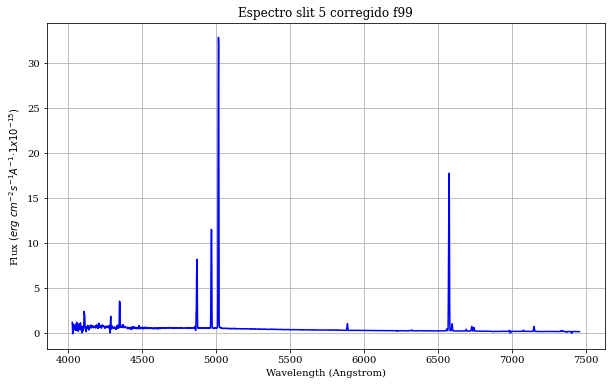

In [29]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave5, flux5_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 5 corregido f99')
plt.grid(True)
plt.show()

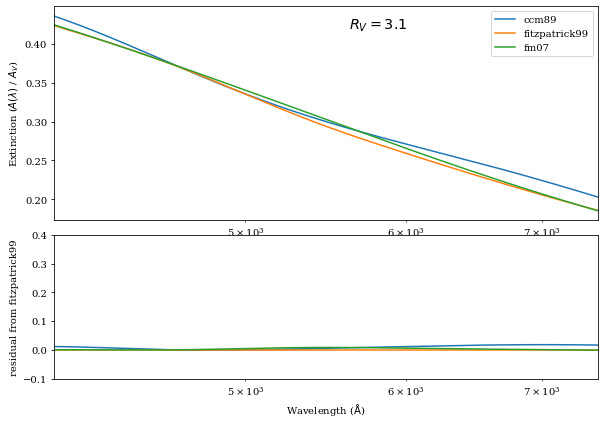

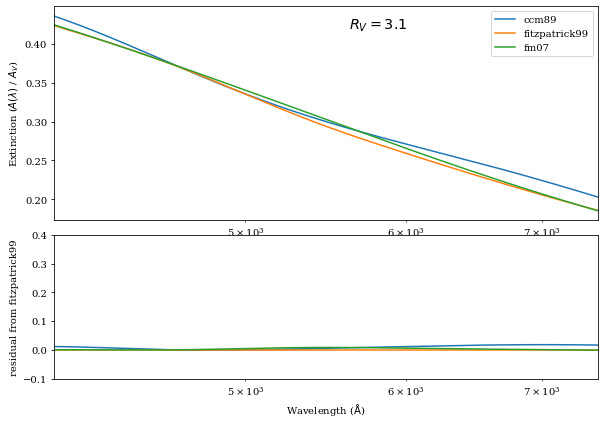

In [30]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda5 = {'ccm89': extinction.ccm89(wave5, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave5, 0.299, 3.1),
            'fm07': extinction.fm07(wave5, 0.299)}
extinction_figure(wave5, a_lambda5, 'fitzpatrick99')

In [31]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data5[0] = flux5_f99

# crear nuevo HDU 
slit5corrected = fits.PrimaryHDU(data=data5, header=header5)

# crear nuevo HDUList para guardar en un fits
sp5_corrected = fits.HDUList([slit5corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file5 = '../../../reduccion/NGC1313/cal/slit5_2D_f99.fits'
sp5_corrected.writeto(new_fits_file5, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file5}")

Se ha guardado el archivo FITS corregido: ../../../reduccion/NGC1313/cal/slit5_2D_f99.fits


SLIT 7

In [32]:
# abrir mi fits
slit7 = '../../../reduccion/NGC1313/cal/slit7.fits'
sp7 = fits.open(slit7)

sp7.info()
sp7[0].header["OBJECT"]

Filename: ../../../reduccion/NGC1313/cal/slit7.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2178, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

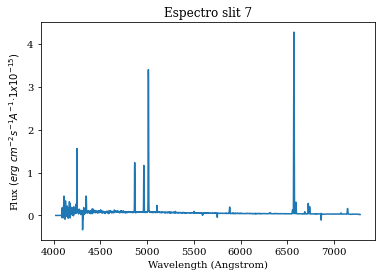

In [33]:
# extraer data (flux)
data7=sp7[0].data
header7=sp7[0].header
obj_name7 = header7.get("OBJECT", "Unknown")

flux7=data7[0]
w7=WCS(header7, naxis=1, relax=False, fix=False)
wave7=w7.wcs_pix2world(np.arange(len(flux7)),0)[0]

plt.plot(wave7, flux7)
plt.title("Espectro slit 7")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [34]:
wave7, flux7

(array([4021.73339844, 4023.2299906 , 4024.72658277, ..., 7276.82135522,
        7278.31794739, 7279.81453955]),
 array([0.        , 0.        , 0.        , ..., 0.02432255, 0.02350372,
        0.02177298], dtype=float32))

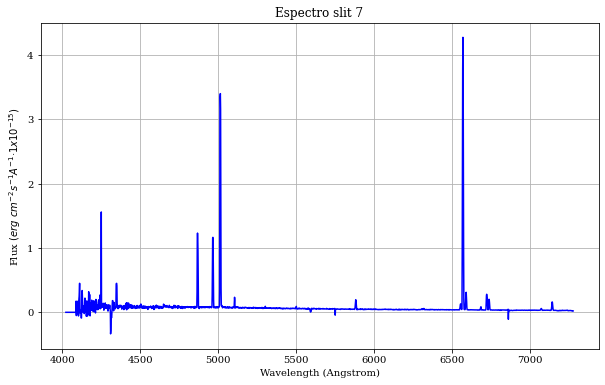

In [35]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave7, flux7, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 7')
plt.grid(True)
plt.show()

In [36]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave7
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave7_ccm89 = extinction.ccm89(wave7, 0.299, 3.1)
print(f' extinción en magnitudes para slit 7 con ccm89: {wave7_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave7_f99 = extinction.fitzpatrick99(wave7, 0.299, 3.1)
print(f' extinción en magnitudes para slit 7 con f99: {wave7_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave7_fm07 = extinction.fm07(wave7, 0.299)
print(f' extinción en magnitudes para slit 7 con fm07: {wave7_fm07}')



 extinción en magnitudes para slit 7 con ccm89: [0.43584896 0.43570619 0.43556324 ... 0.21141671 0.21134704 0.21127738]
 extinción en magnitudes para slit 7 con f99: [0.42368121 0.42355258 0.42342399 ... 0.19341345 0.19334927 0.19328511]
 extinción en magnitudes para slit 7 con fm07: [0.42460002 0.42446847 0.4243369  ... 0.19359522 0.19352588 0.19345657]


In [37]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux7}')

# "deredden" flux by A_V = 0.299 with CCM89
flux7_ccm89 = remove(ccm89(wave7, 0.299, 3.1), flux7)
print(f'valor de flujo deredden para slit 7 con ccm89: {flux7_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux7_f99 = remove(fitzpatrick99(wave7, 0.299, 3.1), flux7)
print(f'valor de flujo deredden para slit 7 con f99: {flux7_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux7_fm07 = remove(fm07(wave7, 0.299), flux7)
print(f'valor de flujo deredden para slit 7 con fm07: {flux7_fm07}')

valor de flujo original: [0.         0.         0.         ... 0.02432255 0.02350372 0.02177298]
valor de flujo deredden para slit 7 con ccm89: [0.         0.         0.         ... 0.02955125 0.02855456 0.02645019]
valor de flujo deredden para slit 7 con f99: [0.         0.         0.         ... 0.02906528 0.02808512 0.02601549]
valor de flujo deredden para slit 7 con fm07: [0.         0.         0.         ... 0.02907015 0.02808969 0.0260196 ]


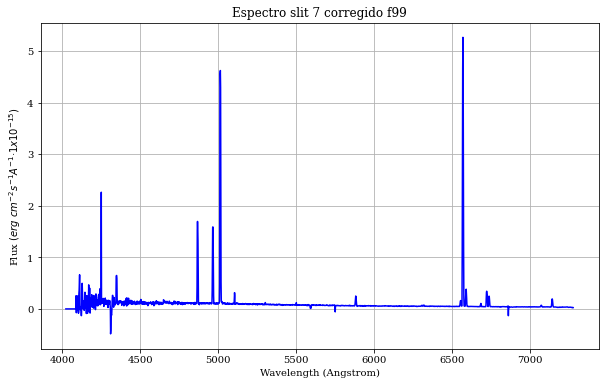

In [38]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave7, flux7_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 7 corregido f99')
plt.grid(True)
plt.show()

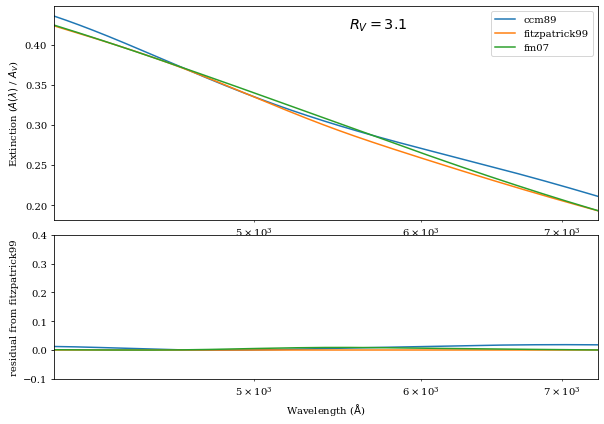

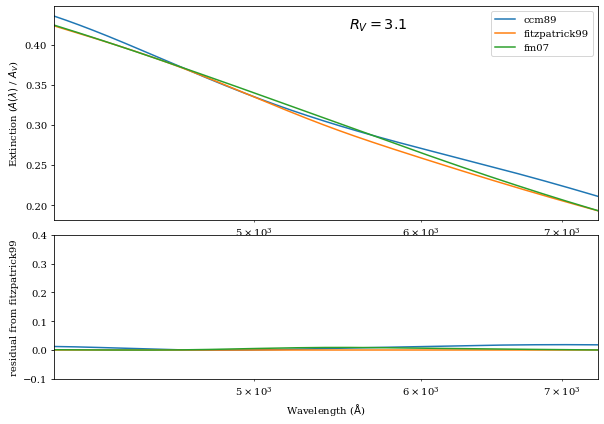

In [39]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda7 = {'ccm89': extinction.ccm89(wave7, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave7, 0.299, 3.1),
            'fm07': extinction.fm07(wave7, 0.299)}
extinction_figure(wave7, a_lambda7, 'fitzpatrick99')

In [40]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data7[0] = flux7_f99

# crear nuevo HDU 
slit7corrected = fits.PrimaryHDU(data=data7, header=header7)

# crear nuevo HDUList para guardar en un fits
sp7_corrected = fits.HDUList([slit7corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file7 = '../../../reduccion/NGC1313/cal/slit7_2D_f99.fits'
sp7_corrected.writeto(new_fits_file7, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file7}")

Se ha guardado el archivo FITS corregido: ../../../reduccion/NGC1313/cal/slit7_2D_f99.fits


SLIT 9

In [41]:
# abrir mi fits
slit9 = '../../../reduccion/NGC1313/cal/slit9.fits'
sp9 = fits.open(slit9)

sp9.info()
sp9[0].header["OBJECT"]

Filename: ../../../reduccion/NGC1313/cal/slit9.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2807, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

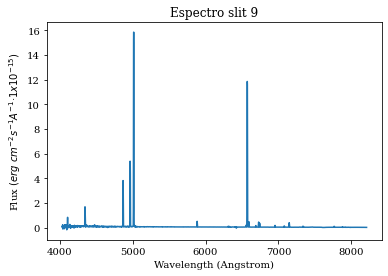

In [42]:
# extraer data (flux)
data9=sp9[0].data
header9=sp9[0].header
obj_name9 = header9.get("OBJECT", "Unknown")

flux9=data9[0]
w9=WCS(header9, naxis=1, relax=False, fix=False)
wave9=w9.wcs_pix2world(np.arange(len(flux9)),0)[0]

plt.plot(wave9, flux9)
plt.title("Espectro slit 9")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [43]:
wave9, flux9

(array([4035.11450195, 4036.60158134, 4038.08866072, ..., 8204.88508892,
        8206.3721683 , 8207.85924768]),
 array([0.05935967, 0.08791086, 0.04706356, ..., 0.01801529, 0.01813462,
        0.01958222], dtype=float32))

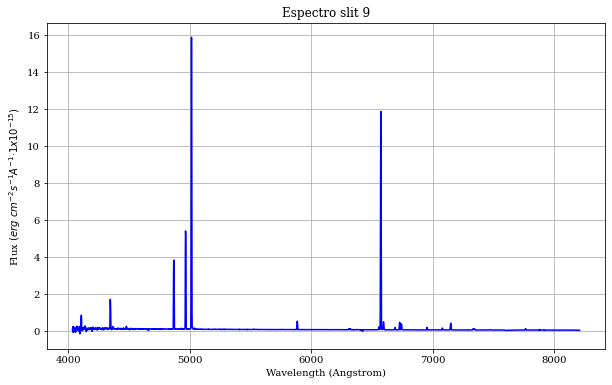

In [44]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave9, flux9, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 9')
plt.grid(True)
plt.show()

In [45]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave9
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave9_ccm89 = extinction.ccm89(wave9, 0.299, 3.1)
print(f' extinción en magnitudes para slit 9 con ccm89: {wave9_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave9_f99 = extinction.fitzpatrick99(wave9, 0.299, 3.1)
print(f' extinción en magnitudes para slit 9 con f99: {wave9_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave9_fm07 = extinction.fm07(wave9, 0.299)
print(f' extinción en magnitudes para slit 9 con fm07: {wave9_fm07}')



 extinción en magnitudes para slit 9 con ccm89: [0.43456625 0.43442285 0.43427928 ... 0.17008655 0.17002625 0.16996599]
 extinción en magnitudes para slit 9 con f99: [0.42253232 0.4224048  0.42227731 ... 0.15854306 0.15849445 0.15844585]
 extinción en magnitudes para slit 9 con fm07: [0.42342342 0.42329261 0.42316178 ... 0.15623659 0.15618498 0.15613339]


In [46]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux9}')

# "deredden" flux by A_V = 0.299 with CCM89
flux9_ccm89 = remove(ccm89(wave9, 0.299, 3.1), flux9)
print(f'valor de flujo deredden para slit 9 con ccm89: {flux9_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux9_f99 = remove(fitzpatrick99(wave9, 0.299, 3.1), flux9)
print(f'valor de flujo deredden para slit 9 con f99: {flux9_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux9_fm07 = remove(fm07(wave9, 0.299), flux9)
print(f'valor de flujo deredden para slit 9 con fm07: {flux9_fm07}')

valor de flujo original: [0.05935967 0.08791086 0.04706356 ... 0.01801529 0.01813462 0.01958222]
valor de flujo deredden para slit 9 con ccm89: [0.08857639 0.1311631  0.0702096  ... 0.02107055 0.02120894 0.02290068]
valor de flujo deredden para slit 9 con f99: [0.08760006 0.12971926 0.06943776 ... 0.02084772 0.02098486 0.02265898]
valor de flujo deredden para slit 9 con fm07: [0.08767199 0.12982537 0.06949435 ... 0.02080348 0.02094027 0.02261077]


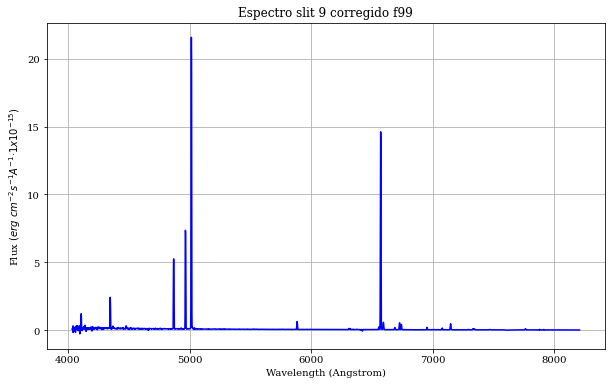

In [47]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave9, flux9_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 9 corregido f99')
plt.grid(True)
plt.show()

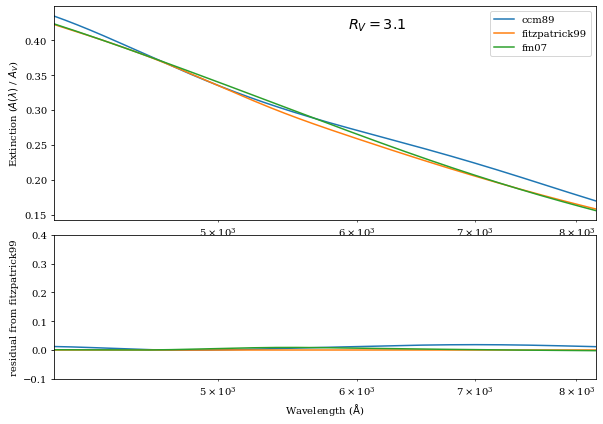

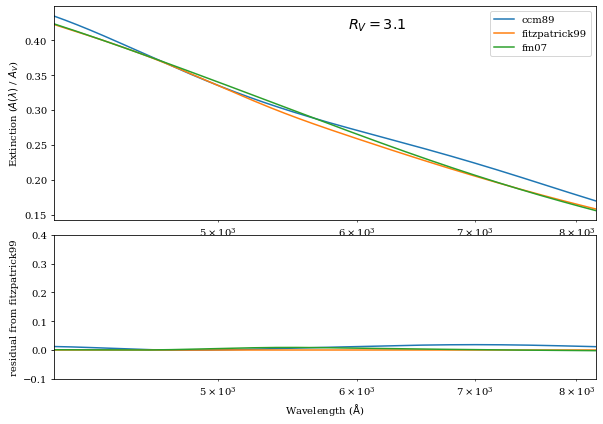

In [48]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda9 = {'ccm89': extinction.ccm89(wave9, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave9, 0.299, 3.1),
            'fm07': extinction.fm07(wave9, 0.299)}
extinction_figure(wave9, a_lambda9, 'fitzpatrick99')

In [49]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data9[0] = flux9_f99

# crear nuevo HDU 
slit9corrected = fits.PrimaryHDU(data=data9, header=header9)

# crear nuevo HDUList para guardar en un fits
sp9_corrected = fits.HDUList([slit9corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file9 = '../../../reduccion/NGC1313/cal/slit9_2D_f99.fits'
sp9_corrected.writeto(new_fits_file9, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file9}")

Se ha guardado el archivo FITS corregido: ../../../reduccion/NGC1313/cal/slit9_2D_f99.fits


SLIT 11

In [50]:
# abrir mi fits
slit11 = '../../../reduccion/NGC1313/cal/slit11.fits'
sp11 = fits.open(slit11)

sp11.info()
sp11[0].header["OBJECT"]

Filename: ../../../reduccion/NGC1313/cal/slit11.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2789, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

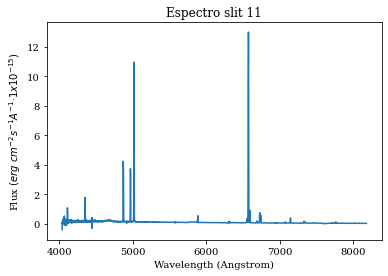

In [51]:
# extraer data (flux)
data11=sp11[0].data
header11=sp11[0].header
obj_name11 = header11.get("OBJECT", "Unknown")

flux11=data11[0]
w11=WCS(header11, naxis=1, relax=False, fix=False)
wave11=w11.wcs_pix2world(np.arange(len(flux11)),0)[0]

plt.plot(wave11, flux11)
plt.title("Espectro slit 11")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [52]:
wave11, flux11

(array([4035.4362793 , 4036.92377269, 4038.41126609, ..., 8179.59288001,
        8181.08037341, 8182.5678668 ]),
 array([-0.39257786,  0.09593909,  0.08961169, ...,  0.04024966,
         0.03908245,  0.03922698], dtype=float32))

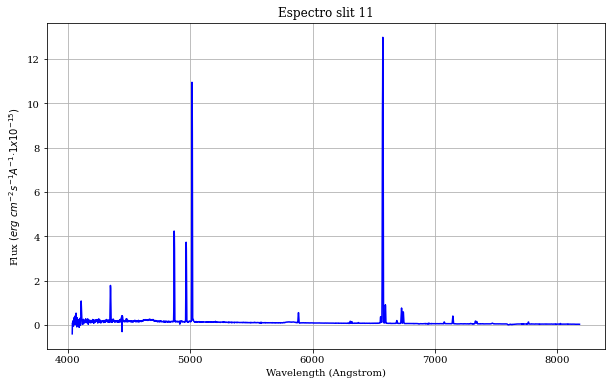

In [53]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave11, flux11, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 11')
plt.grid(True)
plt.show()

In [54]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave11
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave11_ccm89 = extinction.ccm89(wave11, 0.299, 3.1)
print(f' extinción en magnitudes para slit 11 con ccm89: {wave11_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave11_f99 = extinction.fitzpatrick99(wave11, 0.299, 3.1)
print(f' extinción en magnitudes para slit 11 con f99: {wave11_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave11_fm07 = extinction.fm07(wave11, 0.299)
print(f' extinción en magnitudes para slit 11 con fm07: {wave11_fm07}')



 extinción en magnitudes para slit 11 con ccm89: [0.43453524 0.43439176 0.43424811 ... 0.17111645 0.17105565 0.17099488]
 extinción en magnitudes para slit 11 con f99: [0.42250472 0.42237717 0.42224965 ... 0.1593732  0.15932421 0.15927524]
 extinción en magnitudes para slit 11 con fm07: [0.42339511 0.42326426 0.4231334  ... 0.1571181  0.15706606 0.15701405]


In [55]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux11}')

# "deredden" flux by A_V = 0.299 with CCM89
flux11_ccm89 = remove(ccm89(wave11, 0.299, 3.1), flux11)
print(f'valor de flujo deredden para slit 11 con ccm89: {flux11_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux11_f99 = remove(fitzpatrick99(wave11, 0.299, 3.1), flux11)
print(f'valor de flujo deredden para slit 11 con f99: {flux11_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux11_fm07 = remove(fm07(wave11, 0.299), flux11)
print(f'valor de flujo deredden para slit 11 con fm07: {flux11_fm07}')

valor de flujo original: [-0.39257786  0.09593909  0.08961169 ...  0.04024966  0.03908245
  0.03922698]
valor de flujo deredden para slit 11 con ccm89: [-0.58578722  0.14313713  0.13367922 ...  0.04712038  0.04575136
  0.04591798]
valor de flujo deredden para slit 11 con f99: [-0.57933223  0.14156193  0.13221006 ...  0.04661347  0.04525968
  0.045425  ]
valor de flujo deredden para slit 11 con fm07: [-0.57980752  0.14167764  0.13231772 ...  0.04651676  0.04516564
  0.04533049]


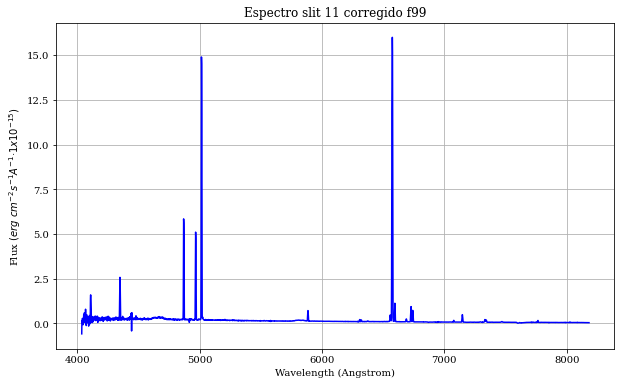

In [56]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave11, flux11_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 11 corregido f99')
plt.grid(True)
plt.show()

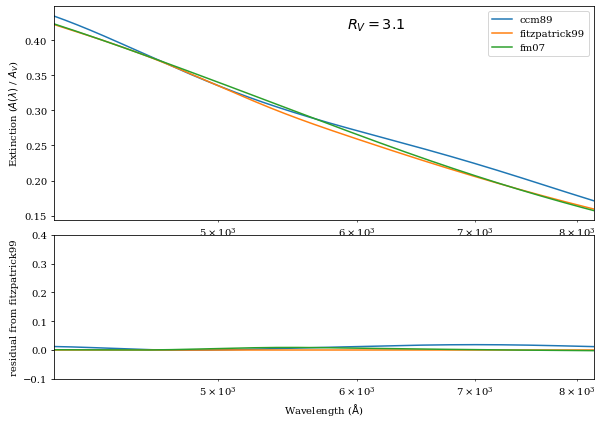

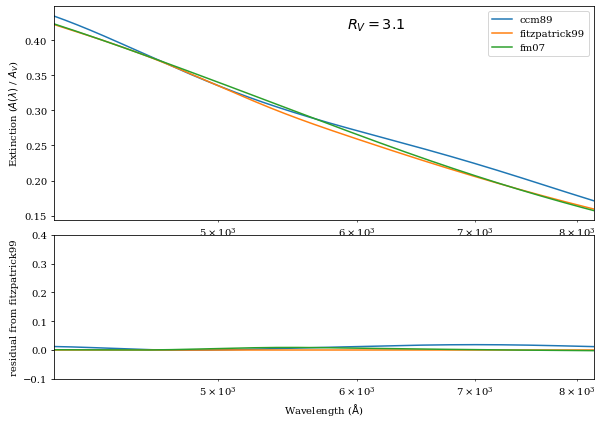

In [57]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda11 = {'ccm89': extinction.ccm89(wave11, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave11, 0.299, 3.1),
            'fm07': extinction.fm07(wave11, 0.299)}
extinction_figure(wave11, a_lambda11, 'fitzpatrick99')

In [58]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data11[0] = flux11_f99

# crear nuevo HDU 
slit11corrected = fits.PrimaryHDU(data=data11, header=header11)

# crear nuevo HDUList para guardar en un fits
sp11_corrected = fits.HDUList([slit11corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file11 = '../../../reduccion/NGC1313/cal/slit11_2D_f99.fits'
sp11_corrected.writeto(new_fits_file11, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file11}")

Se ha guardado el archivo FITS corregido: ../../../reduccion/NGC1313/cal/slit11_2D_f99.fits


SLIT 13

In [59]:
# abrir mi fits
slit13 = '../../../reduccion/NGC1313/cal/slit13.fits'
sp13 = fits.open(slit13)

sp13.info()
sp13[0].header["OBJECT"]

Filename: ../../../reduccion/NGC1313/cal/slit13.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2519, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

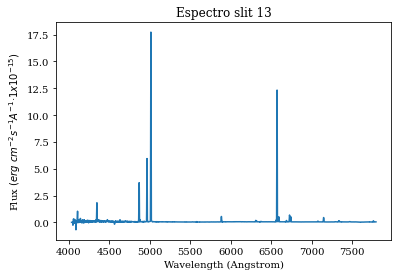

In [60]:
# extraer data (flux)
data13=sp13[0].data
header13=sp13[0].header
obj_name13 = header13.get("OBJECT", "Unknown")

flux13=data13[0]
w13=WCS(header13, naxis=1, relax=False, fix=False)
wave13=w13.wcs_pix2world(np.arange(len(flux13)),0)[0]

plt.plot(wave13, flux13)
plt.title("Espectro slit 13")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [61]:
wave13, flux13

(array([4035.56054688, 4037.05235994, 4038.544173  , ..., 7788.96221495,
        7790.45402801, 7791.94584107]),
 array([0.        , 0.        , 0.        , ..., 0.03493275, 0.03693881,
        0.04341558], dtype=float32))

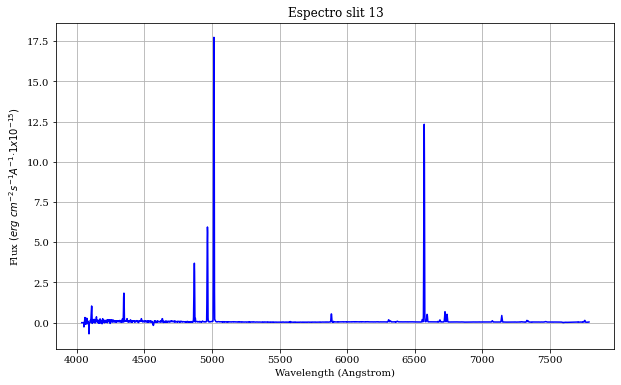

In [62]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave13, flux13, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 13')
plt.grid(True)
plt.show()

In [63]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave13
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave13_ccm89 = extinction.ccm89(wave13, 0.299, 3.1)
print(f' extinción en magnitudes para slit 13 con ccm89: {wave13_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave13_f99 = extinction.fitzpatrick99(wave13, 0.299, 3.1)
print(f' extinción en magnitudes para slit 13 con f99: {wave13_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave13_fm07 = extinction.fm07(wave13, 0.299)
print(f' extinción en magnitudes para slit 13 con fm07: {wave13_fm07}')



 extinción en magnitudes para slit 13 con ccm89: [0.43452326 0.43437935 0.43423527 ... 0.18790825 0.18784155 0.18777487]
 extinción en magnitudes para slit 13 con f99: [0.42249406 0.42236615 0.42223826 ... 0.17300623 0.17295114 0.17289607]
 extinción en magnitudes para slit 13 con fm07: [0.42338418 0.42325295 0.42312171 ... 0.17165252 0.17159358 0.17153467]


In [64]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux13}')

# "deredden" flux by A_V = 0.299 with CCM89
flux13_ccm89 = remove(ccm89(wave13, 0.299, 3.1), flux13)
print(f'valor de flujo deredden para slit 13 con ccm89: {flux13_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux13_f99 = remove(fitzpatrick99(wave13, 0.299, 3.1), flux13)
print(f'valor de flujo deredden para slit 13 con f99: {flux13_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux13_fm07 = remove(fm07(wave13, 0.299), flux13)
print(f'valor de flujo deredden para slit 13 con fm07: {flux13_fm07}')

valor de flujo original: [0.         0.         0.         ... 0.03493275 0.03693881 0.04341558]
valor de flujo deredden para slit 13 con ccm89: [0.         0.         0.         ... 0.04153327 0.04391567 0.05161258]
valor de flujo deredden para slit 13 con f99: [0.         0.         0.         ... 0.04096711 0.0433175  0.05091011]
valor de flujo deredden para slit 13 con fm07: [0.         0.         0.         ... 0.04091606 0.04326337 0.05084631]


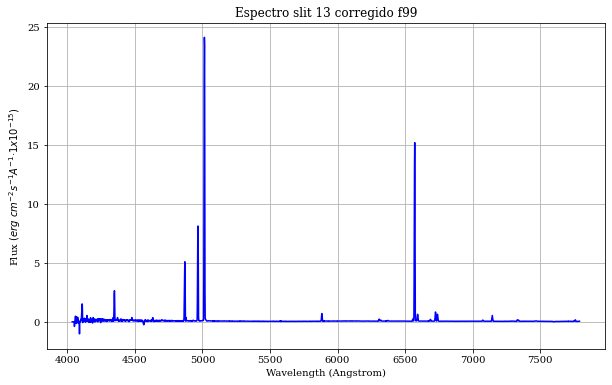

In [65]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave13, flux13_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 13 corregido f99')
plt.grid(True)
plt.show()

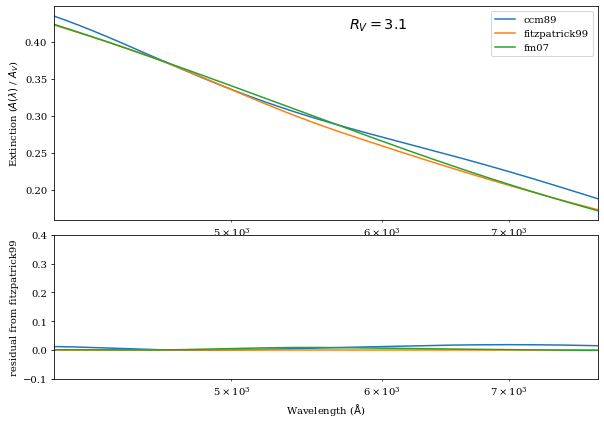

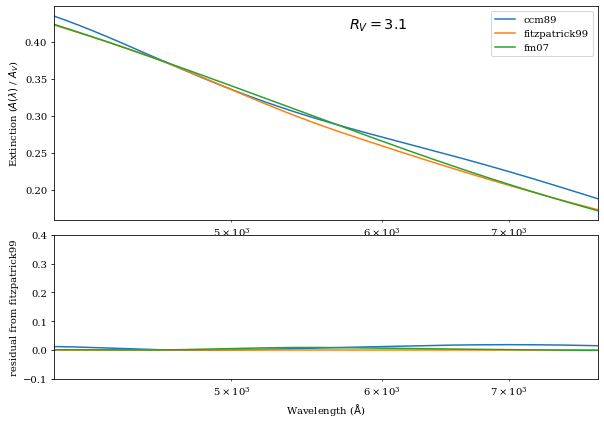

In [66]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda13 = {'ccm89': extinction.ccm89(wave13, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave13, 0.299, 3.1),
            'fm07': extinction.fm07(wave13, 0.299)}
extinction_figure(wave13, a_lambda13, 'fitzpatrick99')

In [67]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data13[0] = flux13_f99

# crear nuevo HDU 
slit13corrected = fits.PrimaryHDU(data=data13, header=header13)

# crear nuevo HDUList para guardar en un fits
sp13_corrected = fits.HDUList([slit13corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file13 = '../../../reduccion/NGC1313/cal/slit13_2D_f99.fits'
sp13_corrected.writeto(new_fits_file13, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file13}")

Se ha guardado el archivo FITS corregido: ../../../reduccion/NGC1313/cal/slit13_2D_f99.fits


SLIT 15

In [68]:
# abrir mi fits
slit15 = '../../../reduccion/NGC1313/cal/slit15.fits'
sp15 = fits.open(slit15)

sp15.info()
sp15[0].header["OBJECT"]

Filename: ../../../reduccion/NGC1313/cal/slit15.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2325, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

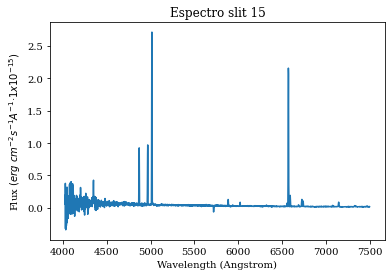

In [69]:
# extraer data (flux)
data15=sp15[0].data
header15=sp15[0].header
obj_name15 = header15.get("OBJECT", "Unknown")

flux15=data15[0]
w15=WCS(header15, naxis=1, relax=False, fix=False)
wave15=w15.wcs_pix2world(np.arange(len(flux15)),0)[0]

plt.plot(wave15, flux15)
plt.title("Espectro slit 15")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [70]:
wave15, flux15

(array([4025.53466797, 4027.02944517, 4028.52422237, ..., 7496.40733242,
        7497.90210962, 7499.39688683]),
 array([-0.3101657 ,  0.3790096 ,  0.04974806, ...,  0.02084091,
         0.01749134,  0.01895424], dtype=float32))

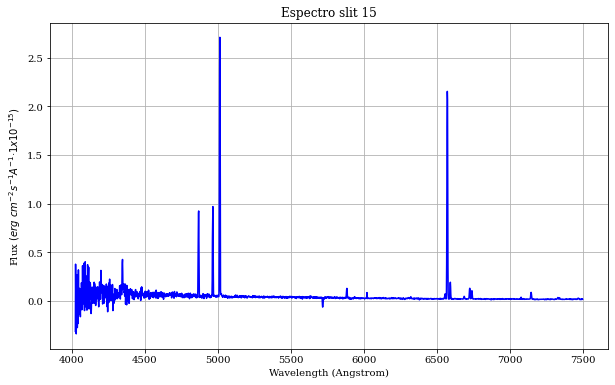

In [71]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave15, flux15, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 15')
plt.grid(True)
plt.show()

In [72]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave7
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave15_ccm89 = extinction.ccm89(wave15, 0.299, 3.1)
print(f' extinción en magnitudes para slit 15 con ccm89: {wave15_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave15_f99 = extinction.fitzpatrick99(wave15, 0.299, 3.1)
print(f' extinción en magnitudes para slit 15 con f99: {wave15_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave15_fm07 = extinction.fm07(wave15, 0.299)
print(f' extinción en magnitudes para slit 15 con fm07: {wave15_fm07}')



 extinción en magnitudes para slit 15 con ccm89: [0.43548599 0.43534294 0.43519973 ... 0.20122855 0.20115956 0.20109057]
 extinción en magnitudes para slit 15 con f99: [0.42335457 0.42322618 0.42309783 ... 0.18428838 0.18422825 0.18416814]
 extinción en magnitudes para slit 15 con fm07: [0.42426586 0.42413444 0.42400301 ... 0.18375756 0.18369286 0.1836282 ]


In [73]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux15}')

# "deredden" flux by A_V = 0.299 with CCM89
flux15_ccm89 = remove(ccm89(wave15, 0.299, 3.1), flux15)
print(f'valor de flujo deredden para slit 15 con ccm89: {flux15_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux15_f99 = remove(fitzpatrick99(wave15, 0.299, 3.1), flux15)
print(f'valor de flujo deredden para slit 15 con f99: {flux15_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux15_fm07 = remove(fm07(wave15, 0.299), flux15)
print(f'valor de flujo deredden para slit 15 con fm07: {flux15_fm07}')

valor de flujo original: [-0.3101657   0.3790096   0.04974806 ...  0.02084091  0.01749134
  0.01895424]
valor de flujo deredden para slit 15 con ccm89: [-0.46322092  0.56596216  0.07427729 ...  0.02508465  0.02105168
  0.02281091]
valor de flujo deredden para slit 15 con f99: [-0.45807396  0.55968116  0.07345397 ...  0.02469631  0.02072594
  0.02245814]
valor de flujo deredden para slit 15 con fm07: [-0.45845859  0.56014955  0.07351523 ...  0.02468424  0.02071573
  0.02244697]


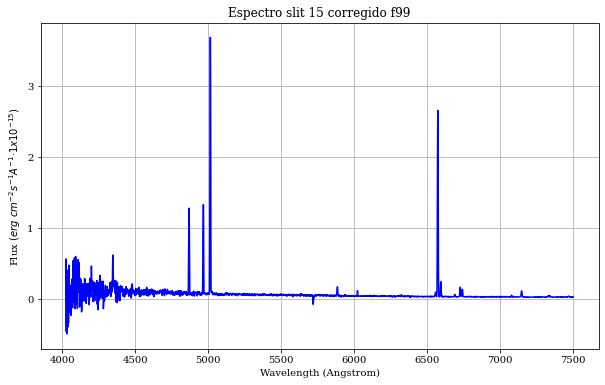

In [74]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave15, flux15_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 15 corregido f99')
plt.grid(True)
plt.show()

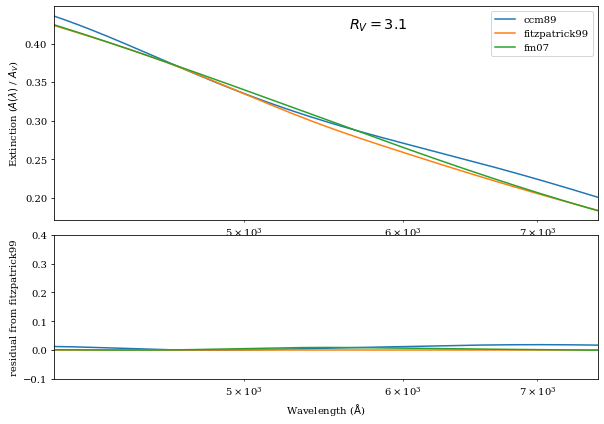

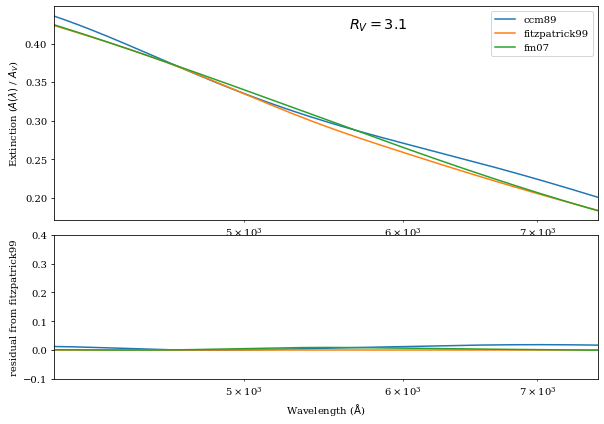

In [75]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda15 = {'ccm89': extinction.ccm89(wave15, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave15, 0.299, 3.1),
            'fm07': extinction.fm07(wave15, 0.299)}
extinction_figure(wave15, a_lambda15, 'fitzpatrick99')

In [76]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data15[0] = flux15_f99

# crear nuevo HDU 
slit15corrected = fits.PrimaryHDU(data=data15, header=header15)

# crear nuevo HDUList para guardar en un fits
sp15_corrected = fits.HDUList([slit15corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file15 = '../../../reduccion/NGC1313/cal/slit15_2D_f99.fits'
sp15_corrected.writeto(new_fits_file15, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file15}")

Se ha guardado el archivo FITS corregido: ../../../reduccion/NGC1313/cal/slit15_2D_f99.fits


SLIT 17

In [77]:
# abrir mi fits
slit17 = '../../../reduccion/NGC1313/cal/slit17.fits'
sp17 = fits.open(slit17)

sp17.info()
sp17[0].header["OBJECT"]

Filename: ../../../reduccion/NGC1313/cal/slit17.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2325, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

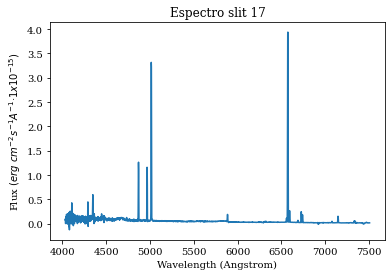

In [78]:
# extraer data (flux)
data17=sp17[0].data
header17=sp17[0].header
obj_name17 = header17.get("OBJECT", "Unknown")

flux17=data17[0]
w17=WCS(header17, naxis=1, relax=False, fix=False)
wave17=w17.wcs_pix2world(np.arange(len(flux17)),0)[0]

plt.plot(wave17, flux17)
plt.title("Espectro slit 17")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [79]:
wave17, flux17

(array([4031.86035156, 4033.35543633, 4034.85052109, ..., 7503.44717026,
        7504.94225502, 7506.43733978]),
 array([0.07924721, 0.10050514, 0.01363148, ..., 0.01888852, 0.01887495,
        0.01901458], dtype=float32))

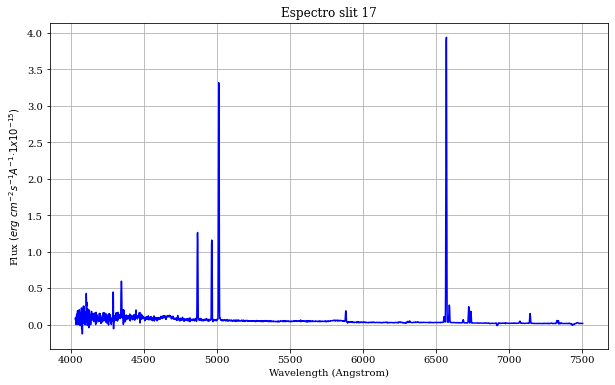

In [80]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave17, flux17, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 17')
plt.grid(True)
plt.show()

In [81]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave9
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave17_ccm89 = extinction.ccm89(wave17, 0.299, 3.1)
print(f' extinción en magnitudes para slit 17 con ccm89: {wave17_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave17_f99 = extinction.fitzpatrick99(wave17, 0.299, 3.1)
print(f' extinción en magnitudes para slit 17 con f99: {wave17_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave17_fm07 = extinction.fm07(wave17, 0.299)
print(f' extinción en magnitudes para slit 17 con fm07: {wave17_fm07}')



 extinción en magnitudes para slit 17 con ccm89: [0.43487947 0.43473566 0.43459169 ... 0.20090369 0.20083472 0.20076575]
 extinción en magnitudes para slit 17 con f99: [0.42281148 0.4226832  0.42255496 ... 0.1840054  0.18394538 0.18388538]
 extinción en magnitudes para slit 17 con fm07: [0.42370963 0.42357814 0.42344664 ... 0.18345313 0.18338856 0.18332403]


In [82]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux17}')

# "deredden" flux by A_V = 0.299 with CCM89
flux17_ccm89 = remove(ccm89(wave17, 0.299, 3.1), flux17)
print(f'valor de flujo deredden para slit 17 con ccm89: {flux17_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux17_f99 = remove(fitzpatrick99(wave17, 0.299, 3.1), flux17)
print(f'valor de flujo deredden para slit 17 con f99: {flux17_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux17_fm07 = remove(fm07(wave17, 0.299), flux17)
print(f'valor de flujo deredden para slit 17 con fm07: {flux17_fm07}')

valor de flujo original: [0.07924721 0.10050514 0.01363148 ... 0.01888852 0.01887495 0.01901458]
valor de flujo deredden para slit 17 con ccm89: [0.11828667 0.14999699 0.02034135 ... 0.0227279  0.02271013 0.02287668]
valor de flujo deredden para slit 17 con f99: [0.11697919 0.14834112 0.02011708 ... 0.02237691 0.02235959 0.02252376]
valor de flujo deredden para slit 17 con fm07: [0.11707599 0.14846345 0.02013361 ... 0.02236553 0.02234813 0.02251212]


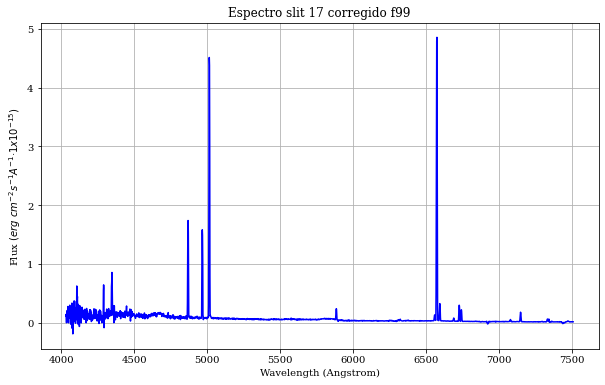

In [83]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave17, flux17_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 17 corregido f99')
plt.grid(True)
plt.show()

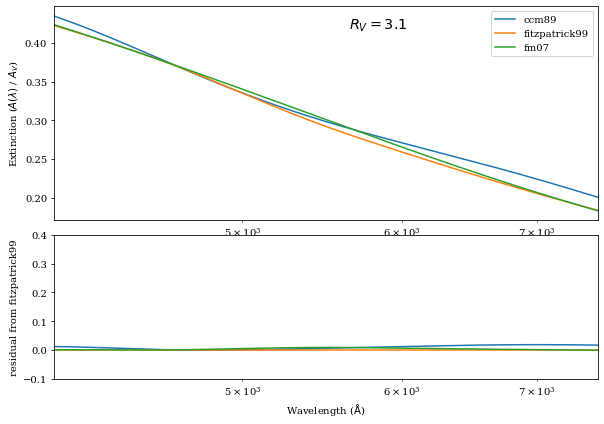

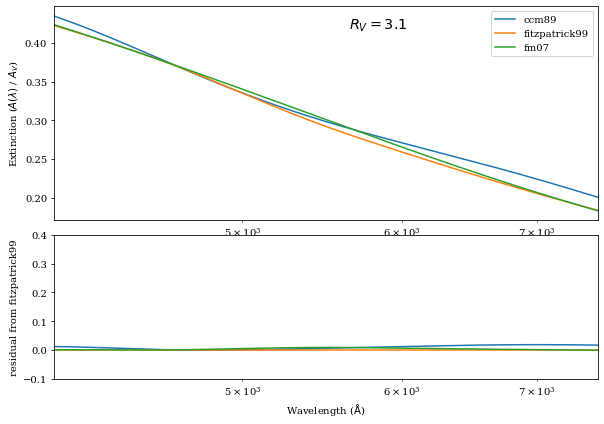

In [84]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda17 = {'ccm89': extinction.ccm89(wave17, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave17, 0.299, 3.1),
            'fm07': extinction.fm07(wave17, 0.299)}
extinction_figure(wave17, a_lambda17, 'fitzpatrick99')

In [85]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data17[0] = flux17_f99

# crear nuevo HDU 
slit17corrected = fits.PrimaryHDU(data=data17, header=header17)

# crear nuevo HDUList para guardar en un fits
sp17_corrected = fits.HDUList([slit17corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file17 = '../../../reduccion/NGC1313/cal/slit17_2D_f99.fits'
sp17_corrected.writeto(new_fits_file17, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file17}")

Se ha guardado el archivo FITS corregido: ../../../reduccion/NGC1313/cal/slit17_2D_f99.fits


SLIT 19

In [86]:
# abrir mi fits
slit19 = '../../../reduccion/NGC1313/cal/slit19.fits'
sp19 = fits.open(slit19)

sp19.info()
sp19[0].header["OBJECT"]

Filename: ../../../reduccion/NGC1313/cal/slit19.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2680, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

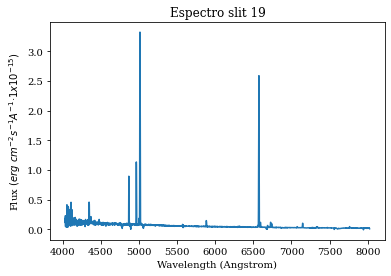

In [87]:
# extraer data (flux)
data19=sp19[0].data
header19=sp19[0].header
obj_name19 = header19.get("OBJECT", "Unknown")

flux19=data19[0]
w19=WCS(header19, naxis=1, relax=False, fix=False)
wave19=w19.wcs_pix2world(np.arange(len(flux19)),0)[0]

plt.plot(wave19, flux19)
plt.title("Espectro slit 19")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [88]:
wave19, flux19

(array([4033.97583008, 4035.46533406, 4036.95483804, ..., 8021.37798369,
        8022.86748767, 8024.35699165]),
 array([0.22060804, 0.10943001, 0.19279249, ..., 0.02183094, 0.01114585,
        0.00970298], dtype=float32))

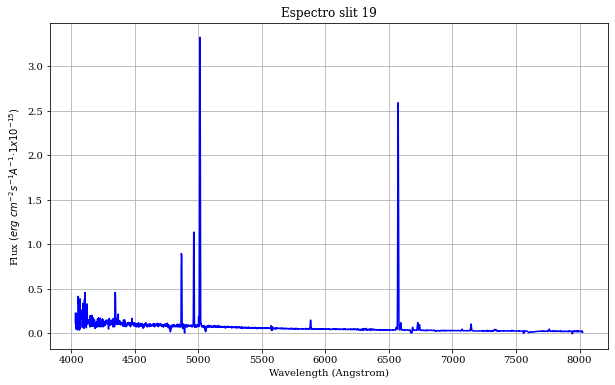

In [89]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave19, flux19, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 19')
plt.grid(True)
plt.show()

In [90]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave3
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave19_ccm89 = extinction.ccm89(wave19, 0.299, 3.1)
print(f' extinción en magnitudes para slit 19 con ccm89: {wave19_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave19_f99 = extinction.fitzpatrick99(wave19, 0.299, 3.1)
print(f' extinción en magnitudes para slit 19 con f99: {wave19_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave19_fm07 = extinction.fm07(wave19, 0.299)
print(f' extinción en magnitudes para slit 19 con fm07: {wave19_fm07}')



 extinción en magnitudes para slit 19 con ccm89: [0.43467594 0.43453243 0.43438876 ... 0.17773389 0.17767029 0.17760671]
 extinción en magnitudes para slit 19 con f99: [0.42262998 0.42250223 0.42237451 ... 0.16470775 0.16465636 0.164605  ]
 extinción en magnitudes para slit 19 con fm07: [0.42352357 0.42339256 0.42326153 ... 0.16279262 0.16273788 0.16268317]


In [91]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux19}')

# "deredden" flux by A_V = 0.299 with CCM89
flux19_ccm89 = remove(ccm89(wave19, 0.299, 3.1), flux19)
print(f'valor de flujo deredden para slit 19 con ccm89: {flux19_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux19_f99 = remove(fitzpatrick99(wave19, 0.299, 3.1), flux19)
print(f'valor de flujo deredden para slit 19 con f99: {flux19_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux19_fm07 = remove(fm07(wave19, 0.299), flux19)
print(f'valor de flujo deredden para slit 19 con fm07: {flux19_fm07}')

valor de flujo original: [0.22060804 0.10943001 0.19279249 ... 0.02183094 0.01114585 0.00970298]
valor de flujo deredden para slit 19 con ccm89: [0.32922417 0.16328617 0.28763757 ... 0.02571378 0.01312748 0.01142741]
valor de flujo deredden para slit 19 con f99: [0.3255917  0.16148691 0.28447226 ... 0.02540712 0.01297107 0.01129139]
valor de flujo deredden para slit 19 con fm07: [0.32585979 0.16161939 0.28470476 ... 0.02536235 0.01294817 0.01127142]


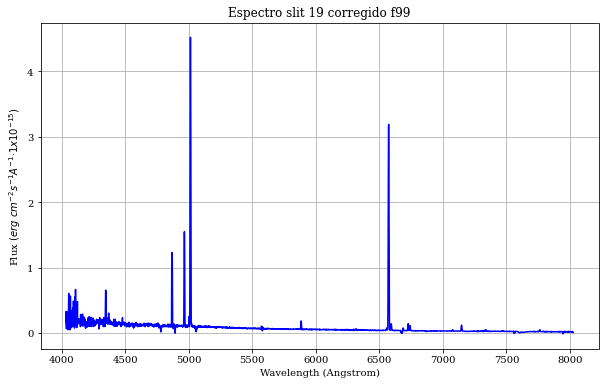

In [92]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave19, flux19_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 19 corregido f99')
plt.grid(True)
plt.show()

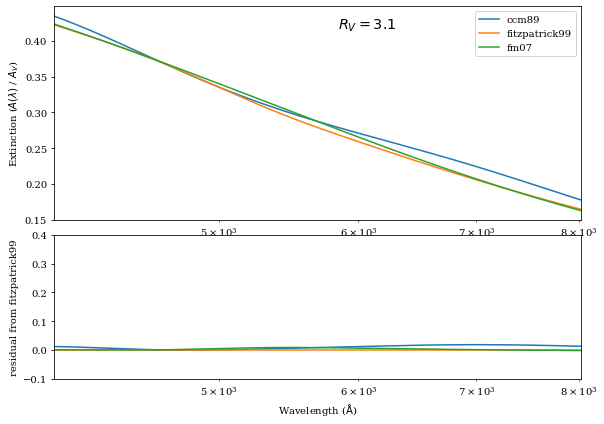

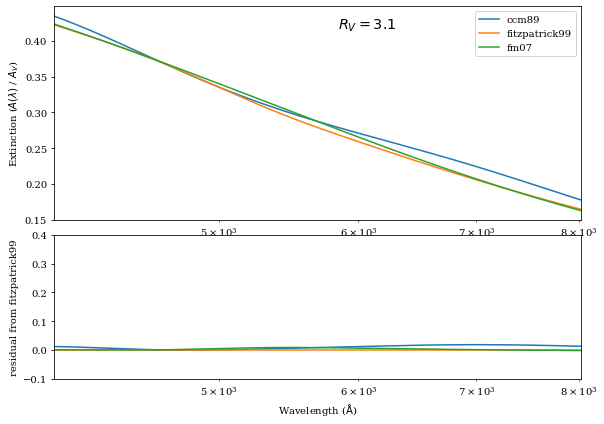

In [93]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda19 = {'ccm89': extinction.ccm89(wave19, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave19, 0.299, 3.1),
            'fm07': extinction.fm07(wave19, 0.299)}
extinction_figure(wave19, a_lambda19, 'fitzpatrick99')

In [94]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data19[0] = flux19_f99

# crear nuevo HDU 
slit19corrected = fits.PrimaryHDU(data=data19, header=header19)

# crear nuevo HDUList para guardar en un fits
sp19_corrected = fits.HDUList([slit19corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file19 = '../../../reduccion/NGC1313/cal/slit19_2D_f99.fits'
sp19_corrected.writeto(new_fits_file19, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file19}")

Se ha guardado el archivo FITS corregido: ../../../reduccion/NGC1313/cal/slit19_2D_f99.fits


SLIT 21

In [95]:
# abrir mi fits
slit21 = '../../../reduccion/NGC1313/cal/slit21.fits'
sp21 = fits.open(slit21)

sp21.info()
sp21[0].header["OBJECT"]

Filename: ../../../reduccion/NGC1313/cal/slit21.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2799, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

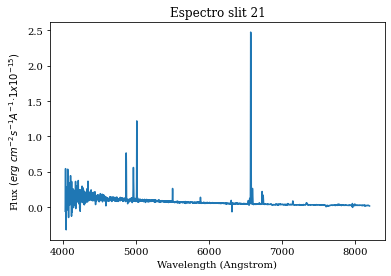

In [96]:
# extraer data (flux)
data21=sp21[0].data
header21=sp21[0].header
obj_name21 = header21.get("OBJECT", "Unknown")

flux21=data21[0]
w21=WCS(header21, naxis=1, relax=False, fix=False)
wave21=w21.wcs_pix2world(np.arange(len(flux21)),0)[0]

plt.plot(wave21, flux21)
plt.title("Espectro slit 21")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [97]:
wave21, flux21

(array([4035.53613281, 4037.02295506, 4038.50977731, ..., 8192.69113684,
        8194.17795908, 8195.66478133]),
 array([-0.05697761,  0.15893006,  0.2841458 , ...,  0.02046324,
         0.0176235 ,  0.01754855], dtype=float32))

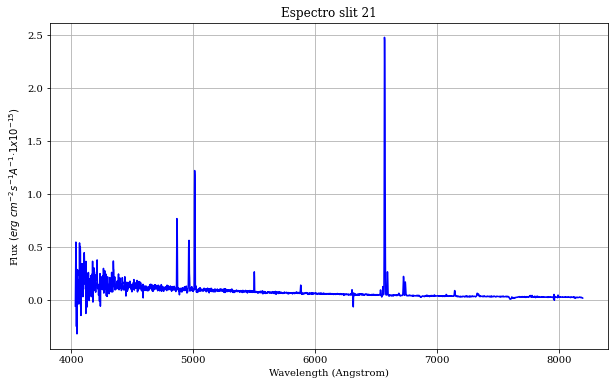

In [98]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave21, flux21, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 21')
plt.grid(True)
plt.show()

In [99]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave7
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave21_ccm89 = extinction.ccm89(wave21, 0.299, 3.1)
print(f' extinción en magnitudes para slit 21 con ccm89: {wave21_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave21_f99 = extinction.fitzpatrick99(wave21, 0.299, 3.1)
print(f' extinción en magnitudes para slit 21 con f99: {wave21_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave21_fm07 = extinction.fm07(wave21, 0.299)
print(f' extinción en magnitudes para slit 21 con fm07: {wave21_fm07}')



 extinción en magnitudes para slit 21 con ccm89: [0.43452561 0.43438218 0.43423859 ... 0.17058206 0.17052154 0.17046104]
 extinción en magnitudes para slit 21 con f99: [0.42249616 0.42236867 0.42224121 ... 0.15894253 0.15889374 0.15884498]
 extinción en magnitudes para slit 21 con fm07: [0.42338633 0.42325554 0.42312474 ... 0.15666072 0.15660892 0.15655714]


In [100]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux21}')

# "deredden" flux by A_V = 0.299 with CCM89
flux21_ccm89 = remove(ccm89(wave21, 0.299, 3.1), flux21)
print(f'valor de flujo deredden para slit 21 con ccm89: {flux21_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux21_f99 = remove(fitzpatrick99(wave21, 0.299, 3.1), flux21)
print(f'valor de flujo deredden para slit 21 con f99: {flux21_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux21_fm07 = remove(fm07(wave21, 0.299), flux21)
print(f'valor de flujo deredden para slit 21 con fm07: {flux21_fm07}')

valor de flujo original: [-0.05697761  0.15893006  0.2841458  ...  0.02046324  0.0176235
  0.01754855]
valor de flujo deredden para slit 21 con ccm89: [-0.08501871  0.23711495  0.4238739  ...  0.02394457  0.02062057
  0.02053173]
valor de flujo deredden para slit 21 con f99: [-0.08408194  0.23450576  0.41921588 ...  0.02368925  0.02040091
  0.02031324]
valor de flujo deredden para slit 21 con fm07: [-0.08415091  0.2346974   0.41955716 ...  0.02363952  0.02035803
  0.02027048]


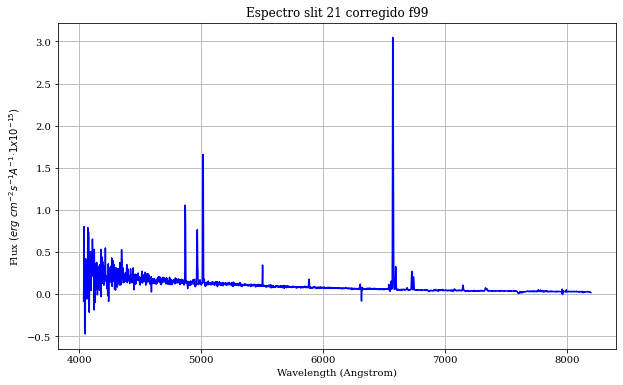

In [101]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave21, flux21_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 21 corregido f99')
plt.grid(True)
plt.show()

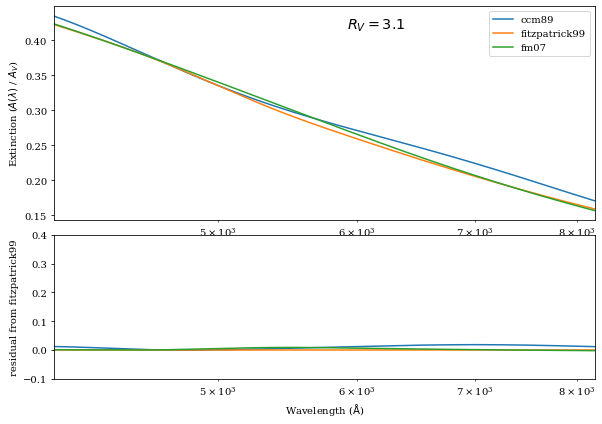

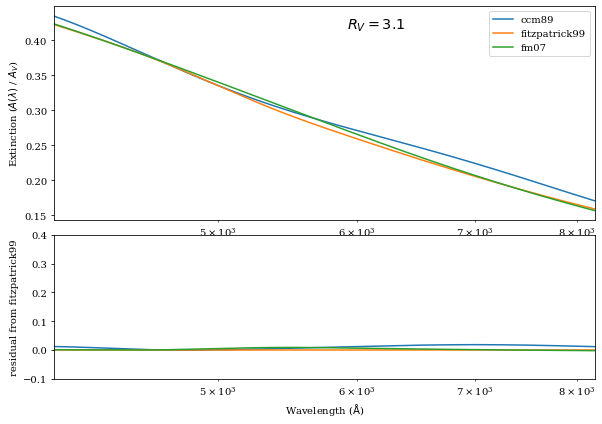

In [102]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda21 = {'ccm89': extinction.ccm89(wave21, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave21, 0.299, 3.1),
            'fm07': extinction.fm07(wave21, 0.299)}
extinction_figure(wave21, a_lambda21, 'fitzpatrick99')

In [103]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data21[0] = flux21_f99

# crear nuevo HDU 
slit21corrected = fits.PrimaryHDU(data=data21, header=header21)

# crear nuevo HDUList para guardar en un fits
sp21_corrected = fits.HDUList([slit21corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file21 = '../../../reduccion/NGC1313/cal/slit21_2D_f99.fits'
sp21_corrected.writeto(new_fits_file21, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file21}")

Se ha guardado el archivo FITS corregido: ../../../reduccion/NGC1313/cal/slit21_2D_f99.fits


SLIT 23

In [104]:
# abrir mi fits
slit23 = '../../../reduccion/NGC1313/cal/slit23.fits'
sp23 = fits.open(slit23)

sp23.info()
sp23[0].header["OBJECT"]

Filename: ../../../reduccion/NGC1313/cal/slit23.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2704, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

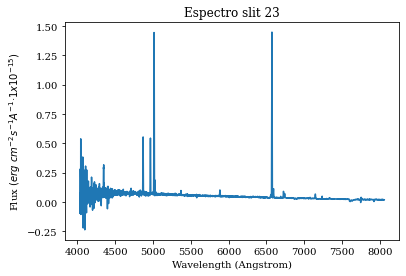

In [105]:
# extraer data (flux)
data23=sp23[0].data
header23=sp23[0].header
obj_name23 = header23.get("OBJECT", "Unknown")

flux23=data23[0]
w23=WCS(header23, naxis=1, relax=False, fix=False)
wave23=w23.wcs_pix2world(np.arange(len(flux23)),0)[0]

plt.plot(wave23, flux23)
plt.title("Espectro slit 23")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [106]:
wave23, flux23

(array([4033.54272461, 4035.03133249, 4036.51994038, ..., 8054.27261782,
        8055.7612257 , 8057.24983358]),
 array([ 0.07697215, -0.09624738, -0.06405802, ...,  0.02005473,
         0.0208165 ,  0.02014694], dtype=float32))

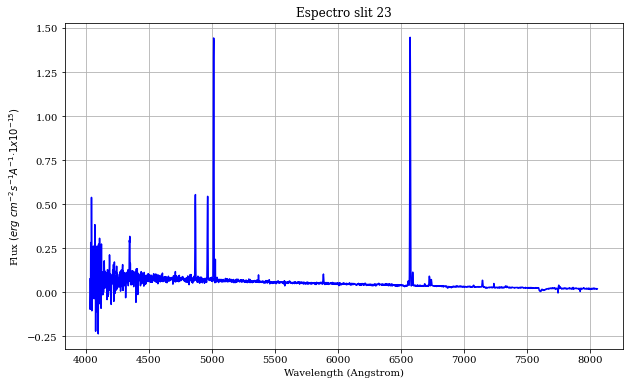

In [107]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave23, flux23, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 23')
plt.grid(True)
plt.show()

In [108]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave9
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave23_ccm89 = extinction.ccm89(wave23, 0.299, 3.1)
print(f' extinción en magnitudes para slit 23 con ccm89: {wave23_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave23_f99 = extinction.fitzpatrick99(wave23, 0.299, 3.1)
print(f' extinción en magnitudes para slit 23 con f99: {wave23_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave23_fm07 = extinction.fm07(wave23, 0.299)
print(f' extinción en magnitudes para slit 23 con fm07: {wave23_fm07}')



 extinción en magnitudes para slit 23 con ccm89: [0.43471764 0.43457427 0.43443073 ... 0.17633475 0.17627171 0.17620869]
 extinción en magnitudes para slit 23 con f99: [0.42266713 0.42253945 0.4224118  ... 0.16357821 0.16352735 0.16347652]
 extinción en magnitudes para slit 23 con fm07: [0.42356167 0.42343073 0.42329979 ... 0.1615897  0.16153555 0.16148143]


In [109]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux23}')

# "deredden" flux by A_V = 0.299 with CCM89
flux23_ccm89 = remove(ccm89(wave23, 0.299, 3.1), flux23)
print(f'valor de flujo deredden para slit 23 con ccm89: {flux23_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux23_f99 = remove(fitzpatrick99(wave23, 0.299, 3.1), flux23)
print(f'valor de flujo deredden para slit 23 con f99: {flux23_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux23_fm07 = remove(fm07(wave23, 0.299), flux23)
print(f'valor de flujo deredden para slit 23 con fm07: {flux23_fm07}')





valor de flujo original: [ 0.07697215 -0.09624738 -0.06405802 ...  0.02005473  0.0208165
  0.02014694]
valor de flujo deredden para slit 23 con ccm89: [ 0.11487372 -0.14362123 -0.09557533 ...  0.02359123  0.02448592
  0.02369695]
valor de flujo deredden para slit 23 con f99: [ 0.11360579 -0.14203805 -0.09452316 ...  0.02331568  0.02420018
  0.02342069]
valor de flujo deredden para slit 23 con fm07: [ 0.11369943 -0.1421547  -0.0946005  ...  0.02327302  0.02415583
  0.02337769]


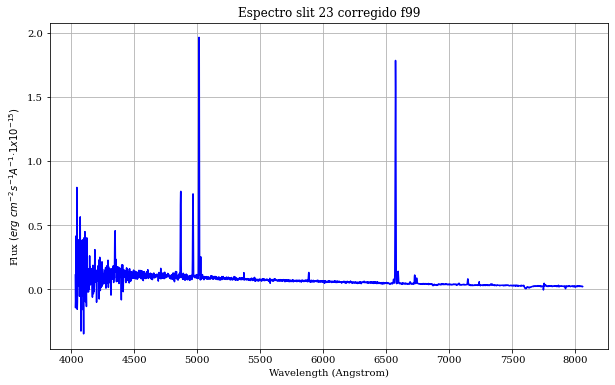

In [110]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave23, flux23_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 23 corregido f99')
plt.grid(True)
plt.show()

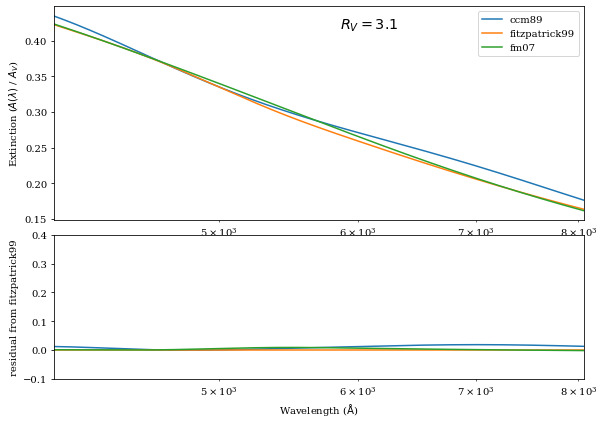

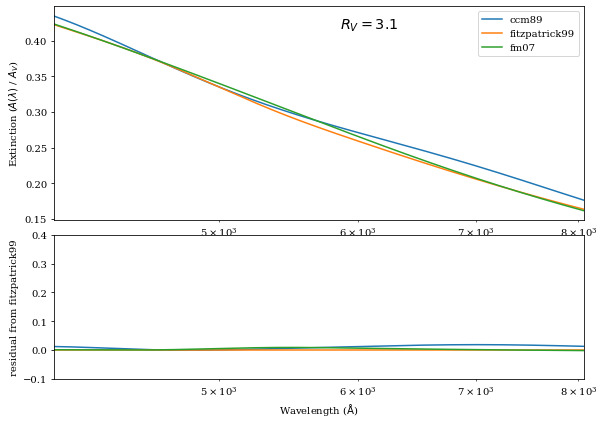

In [111]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda23 = {'ccm89': extinction.ccm89(wave23, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave23, 0.299, 3.1),
            'fm07': extinction.fm07(wave23, 0.299)}
extinction_figure(wave23, a_lambda23, 'fitzpatrick99')

In [112]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data23[0] = flux23_f99

# crear nuevo HDU 
slit23corrected = fits.PrimaryHDU(data=data23, header=header23)

# crear nuevo HDUList para guardar en un fits
sp23_corrected = fits.HDUList([slit23corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file23 = '../../../reduccion/NGC1313/cal/slit23_2D_f99.fits'
sp23_corrected.writeto(new_fits_file23, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file23}")

Se ha guardado el archivo FITS corregido: ../../../reduccion/NGC1313/cal/slit23_2D_f99.fits
